<a href="https://www.kaggle.com/code/kiranpatil7022/employee-salary-insights-and-predictions?scriptVersionId=148477031" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1. Loading libraries and data**

In [69]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-robotics-employee-salary/train_dataset.csv
/kaggle/input/ai-robotics-employee-salary/test_dataset.csv
/kaggle/input/ai-robotics-employee-salary/train_salaries.csv


In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [71]:
# load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/train_dataset.csv")
train_data_salaries = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/train_salaries.csv")
#test_data
df_test = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/test_dataset.csv")

In [72]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [73]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [74]:
df_test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [75]:
# merging train_data and train_data_salaries datasets
df = pd.merge(train_data,train_data_salaries,on="jobId")
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


## **2. Exploratory Data Analysis**

In [76]:
df.info()
# no non-null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [77]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [78]:
df[df["salary"]==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [79]:
df[df["salary"]<50]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47
16,JOB1362684407703,COMP14,JUNIOR,MASTERS,PHYSICS,SERVICE,1,91,47
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96,32
119,JOB1362684407806,COMP15,JANITOR,HIGH_SCHOOL,NONE,WEB,6,60,49
...,...,...,...,...,...,...,...,...,...
999860,JOB1362685407547,COMP61,JANITOR,NONE,NONE,EDUCATION,2,37,45
999881,JOB1362685407568,COMP16,JANITOR,HIGH_SCHOOL,NONE,HEALTH,2,61,46
999898,JOB1362685407585,COMP13,JANITOR,HIGH_SCHOOL,NONE,WEB,7,99,41
999901,JOB1362685407588,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,4,46,35


In [80]:
df[df["jobType"]=="JANITOR"].describe()

,yearsExperience,milesFromMetropolis,salary
count,124971.000000,124971.000000,124971.000000
mean,11.969657,49.443815,70.813045
std,7.211544,28.842493,24.643021
min,0.000000,0.000000,17.000000
25%,6.000000,24.000000,52.000000
50%,12.000000,50.000000,68.000000
75%,18.000000,74.000000,86.000000
max,24.000000,99.000000,189.000000


In [81]:
df[df['salary']<31]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
461,JOB1362684408148,COMP14,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,73,23
873,JOB1362684408560,COMP35,JANITOR,NONE,NONE,AUTO,1,84,29
1195,JOB1362684408882,COMP1,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,2,59,28
1397,JOB1362684409084,COMP53,JANITOR,NONE,NONE,EDUCATION,6,90,28
2003,JOB1362684409690,COMP9,JANITOR,NONE,NONE,EDUCATION,1,82,24
...,...,...,...,...,...,...,...,...,...
998124,JOB1362685405811,COMP31,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,74,25
999502,JOB1362685407189,COMP29,JANITOR,NONE,NONE,EDUCATION,2,67,30
999706,JOB1362685407393,COMP28,JANITOR,NONE,NONE,SERVICE,1,86,28
999754,JOB1362685407441,COMP23,JANITOR,HIGH_SCHOOL,NONE,SERVICE,4,81,26


In [82]:
# salaries less then 30 can be removed considering for my target having done a degree its the minimum salary.
df = df[df['salary']>30]
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [83]:
df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [86]:
# since jobid are unique id which do not have any relation with th salary 
# we'll be dropping the jobid
df = df.drop(['jobId'],axis=1)
df
# we can drop the company_id as well but lets check the correlation metrics to confirm

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...
999995,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [87]:
df_test = df_test.drop(['jobId'],axis=1)
df_test

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...
999995,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,COMP19,CTO,DOCTORAL,MATH,OIL,14,63


In [88]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [89]:
df_test.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [90]:
print("train data length: ",len(df))
print("test data length: ",len(df_test))

train data length:  997548
test data length:  1000000


In [91]:
# get unique values in train data set
print("unique values in train dataset\n")
for x in df.columns:
    print(x,":",len(df[x].unique()))

unique values in train dataset

companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [92]:
# get unique values in test data set
print("unique values in test dataset\n")
for x in df_test.columns:
    print(x,":",len(df_test[x].unique()))

unique values in test dataset

companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


By observing the df.info() and df_test.info(), we can see that dataset has more categorical columns then numerical values.          
 1. companyId            
 2. jobType             
 3. degree               
 4. major                
 5. industry 

In [93]:
# creating empty list to store categorical column names and numerical column names respectively.
cat_list = []
num_list = []
# looping on whole data set to get the column names.
for x in df:
    if df[x].dtype == 'object':
        cat_list.append(x)
    else:
        num_list.append(x)
        
print(cat_list);
print(num_list);

['companyId', 'jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


In [94]:
df_cat = df[cat_list]

# Get the unique values from each column
unique_values = []
for col in df_cat.columns:
    unique_values.append(df_cat[col].unique())

# Print the unique values
print(unique_values)

[array(['COMP37', 'COMP19', 'COMP52', 'COMP38', 'COMP7', 'COMP15',
       'COMP24', 'COMP20', 'COMP41', 'COMP56', 'COMP4', 'COMP54',
       'COMP57', 'COMP14', 'COMP61', 'COMP58', 'COMP3', 'COMP44',
       'COMP30', 'COMP27', 'COMP34', 'COMP11', 'COMP31', 'COMP49',
       'COMP0', 'COMP1', 'COMP36', 'COMP47', 'COMP8', 'COMP42', 'COMP50',
       'COMP53', 'COMP48', 'COMP45', 'COMP46', 'COMP2', 'COMP5', 'COMP55',
       'COMP29', 'COMP40', 'COMP33', 'COMP22', 'COMP12', 'COMP25',
       'COMP6', 'COMP23', 'COMP17', 'COMP28', 'COMP21', 'COMP26',
       'COMP43', 'COMP51', 'COMP10', 'COMP59', 'COMP13', 'COMP39',
       'COMP16', 'COMP9', 'COMP32', 'COMP62', 'COMP35', 'COMP18',
       'COMP60'], dtype=object), array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object), array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object), array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE

In [95]:
# we can see there are 'NONE' in 'degree' and 'major'.
print("df shape", df.shape)
deg_none = df[df['degree']=='NONE']
maj_none = df[df['major']=='NONE']
both_none = df[(df['degree'] == 'NONE') & (df['major'] == 'NONE')]
print("both are NONE", both_none.shape)
print("degree is NONE", deg_none.shape)
print("major is NONE", maj_none.shape)

df shape (997548, 8)
both are NONE (235612, 8)
degree is NONE (235612, 8)
major is NONE (529906, 8)


In [96]:
# we have few degree but no major
# only major NONE
only_major = df[(df['major']=='NONE') & (df['degree']!='NONE')]
only_major

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
8,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
10,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102
24,COMP20,CEO,BACHELORS,NONE,WEB,12,8,202
28,COMP11,JANITOR,HIGH_SCHOOL,NONE,FINANCE,20,23,101
...,...,...,...,...,...,...,...,...
999990,COMP39,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,17,23,89
999996,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   companyId            997548 non-null  object
 1   jobType              997548 non-null  object
 2   degree               997548 non-null  object
 3   major                997548 non-null  object
 4   industry             997548 non-null  object
 5   yearsExperience      997548 non-null  int64 
 6   milesFromMetropolis  997548 non-null  int64 
 7   salary               997548 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 68.5+ MB


In [98]:
corr = df[num_list].corr()
corr.style.background_gradient(cmap='coolwarm')

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.003642,0.370974
milesFromMetropolis,0.003642,1.000000,-0.294435
salary,0.370974,-0.294435,1.000000


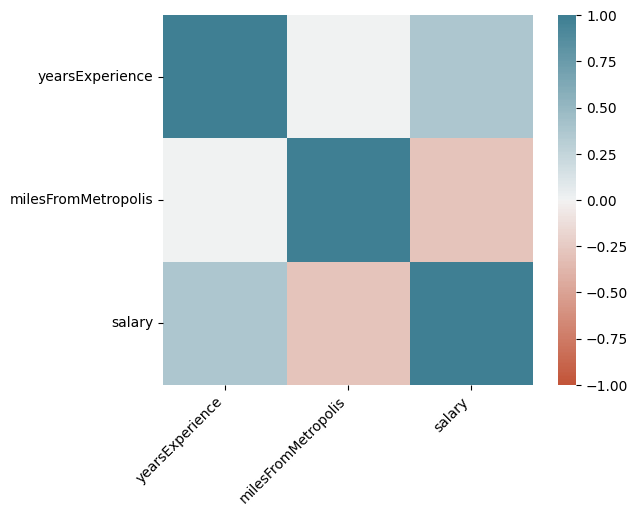

In [99]:
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );

## chi-square test

In [100]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [101]:
def perform_chi_square_test(var_1,var2):
    
    #contingency Table
    contingency_table = pd.crosstab(df[var_1], df[var_2])

    #observed Values
    observed_values = contingency_table.values

    #Expected values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]

    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0]) 
    no_of_columns = len(contingency_table.iloc[0,0:]) 
    degree_f = (no_of_rows-1)*(no_of_columns-1) 
    print("Degree of Freedom:", degree_f)

    #significance Level 5%
    alpha = 0.05
    print("significance level:", alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi_square", chi_square)
    print("chi-square statistic:", chi_square_statistic)

    #critical value
    critical_value = chi2.ppf(q=1-alpha,df=degree_f) 
    print("critical value:",critical_value)
    
    #OR

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)
    print("p-value:",p_value)
    
    if chi_square_statistic>=critical_value:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is NO Relationship between 2 categorical variables")
     
    if p_value<=alpha:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is NO Relationship between 2 categorical variables")

In [102]:
cat_list1 = cat_list.copy()
cat_list1.remove('companyId')
cat_list1

['jobType', 'degree', 'major', 'industry']

In [103]:
#looping on categorical data list and using function for performing chi-squared test on columns for the dataset
for x in cat_list1:
    for i in cat_list1:
        if i != x:
            print("chi-square test on : ",x," ",i,"\n")
            perform_chi_square_test(x,i)
            print("-----------------------------------------\n")

chi-square test on :  jobType   degree 

Degree of Freedom: 42
significance level: 0.05
chi_square [15.39201035 84.91409257  6.08316213 14.52345774 12.01163852  3.94783291
 10.48883799]
chi-square statistic: 100.30610291761408
critical value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-----------------------------------------

chi-square test on :  jobType   major 

Degree of Freedom: 42
significance level: 0.05
chi_square [15.39201035 84.91409257  6.08316213 14.52345774 12.01163852  3.94783291
 10.48883799]
chi-square statistic: 100.30610291761408
critical value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-----------------------------------------

chi-square test on :  jobType   industry 

Degree of Freedom:

In [104]:
# something is not working properly